The dataset I chose has data on earthquakes from 1906 to present day. I chose this dataset because earthquakes are quite a massive natural disaster when they occur, so it's worth looking into any patterns in where they occur, when they occur, if certain types of fault lines tend to have greater magnitude earthquakes, etc. This dataset is from the United States Geological Survey USGS. 

In [131]:
import pandas as pd
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
from vega_datasets import data
import geopandas as gpd

In [138]:
eq = pd.read_csv('Global_Earthquake_Data.csv')
faults = pd.read_csv('all.csv')
faults['legend'] = ['Tectonic Faults' for elem in faults['plate']]
eq['Date'] = pd.to_datetime(eq['time'])
#eq['updated'] = pd.to_datetime(eq['updated'])

eq.head(5)


time  latitude  longitude    depth  mag magType    nst  \
0  2023-02-26T23:58:05.052Z   41.8050    79.8675   10.000  5.0      mb   46.0   
1  2023-02-26T23:33:17.641Z   18.7420   145.4868  200.365  4.8      mb   67.0   
2  2023-02-26T21:42:14.541Z   42.0857    79.9516   10.000  4.9      mb   45.0   
3  2023-02-26T21:35:01.303Z   14.9364  -104.5563   10.000  4.6      mb   51.0   
4  2023-02-26T18:58:54.828Z   44.6730   146.5159  134.299  4.5      mb  108.0   

     gap   dmin   rms  ...                                   place  \
0   91.0  1.293  0.80  ...                77 km NNW of Aksu, China   
1   85.0  5.158  0.95  ...  Pagan region, Northern Mariana Islands   
2   77.0  1.223  0.82  ...                                     NaN   
3  217.0  5.661  0.57  ...              northern East Pacific Rise   
4   62.0  2.866  0.82  ...              84 km NE of Otrada, Russia   

         type horizontalError depthError magError  magNst    status  \
0  earthquake            6.59      1.897    0.078    52.0  reviewed   
1  earthquake           10.27      7.539    0.043   165.0  reviewed   
2  earthquake            6.27      1.869    0.086    42.0  reviewed   
3  earthquake           11.79      1.984    0.038   205.0  reviewed   
4  earthquake            8.66      5.863    0.059    84.0  reviewed   

   locationSource  magSource                             Date  
0              us         us 2023-02-26 23:58:05.052000+00:00  
1              us         us 2023-02-26 23:33:17.641000+00:00  
2              us         us 2023-02-26 21:42:14.541000+00:00  
3              us         us 2023-02-26 21:35:01.303000+00:00  
4              us         us 2023-02-26 18:58:54.828000+00:00  

[5 rows x 23 columns]

In [139]:
faults.head(5)

plate     lat      lon           legend
0    am  30.754  132.824  Tectonic Faults
1    am  30.970  132.965  Tectonic Faults
2    am  31.216  133.197  Tectonic Faults
3    am  31.515  133.500  Tectonic Faults
4    am  31.882  134.042  Tectonic Faults

In [140]:
eq = eq[eq['depth'] >= 0]
eq.describe()

latitude      longitude          depth            mag  \
count  282394.000000  282394.000000  282394.000000  282394.000000   
mean        4.288525      42.308725      69.831737       4.941205   
std        29.439333     120.620503     115.812929       0.485980   
min       -84.133000    -179.999700       0.000000       3.380000   
25%       -17.463000     -71.321675      10.000000       4.600000   
50%         0.663150      99.518900      33.000000       4.800000   
75%        29.672150     142.332350      60.800000       5.100000   
max        87.386000     180.000000     700.900000       9.500000   

                nst            gap          dmin            rms  \
count  94176.000000  144240.000000  71012.000000  234670.000000   
mean      82.770982      94.921392      4.524170       0.946308   
std       96.197636      47.992858      5.795474       0.330169   
min        0.000000       6.500000      0.000000      -1.000000   
25%       25.000000      59.000000      1.311000       0.790000   
50%       47.000000      89.000000      2.673000       0.940000   
75%      100.000000     123.300000      5.248000       1.100000   
max      934.000000     360.000000     62.626000      69.320000   

       horizontalError     depthError      magError         magNst  
count     63914.000000  146124.000000  84817.000000  197883.000000  
mean          8.415192      10.864889      0.137423      32.223758  
std           4.896550     965.543474      0.112922      53.064969  
min           0.028000      -1.000000      0.000000       0.000000  
25%           6.200000       2.000000      0.068000       6.000000  
50%           8.000000       5.700000      0.102000      15.000000  
75%          10.200000       9.900000      0.173000      35.000000  
max          99.000000  367558.100000      1.840000     941.000000

Text(0.5, 1.0, 'Correlation Heatmap')

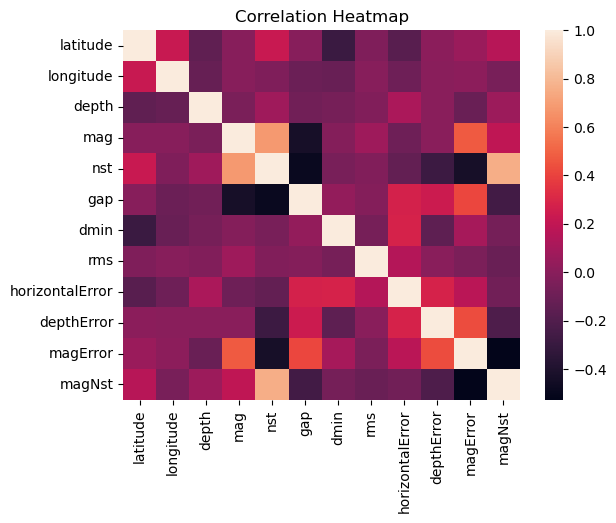

In [141]:
sns.heatmap(eq.corr())
plt.title('Correlation Heatmap')

In [150]:
url= 'https://aeronet.gsfc.nasa.gov/CLIMO_SITE_SUMMARY/world.geo.json'

gdf = gpd.read_file(url)

# define inline geojson data object
data_geojson = alt.InlineData(values=gdf.to_json(), 
    format=alt.DataFormat(property='features',type='json')) 

# make map background
background = alt.Chart(data_geojson).mark_geoshape(
    fill='lightgray',
    stroke='white'
    ).project(
        "equirectangular"
    ).properties(
        width=500,
        height=300
    )

#take sample of 5000 earthquakes for manageable data size
eq_mini = eq.sample(n=5000)

brush = alt.selection_interval()

# add earthquake locations
eq_locations = alt.Chart(eq_mini, title='Earthquake Locations and Their Magnitudes').mark_circle().encode(
    alt.OpacityValue(0.8),
    alt.Color('mag', scale=alt.Scale(scheme='reds')),
    x='longitude:Q',
    xOffset=alt.value(-20),
    y='latitude:Q',
    tooltip=['place', 'mag'],
    size=alt.value(10)
).add_params(brush)

# add fault line locations
fault_locations = alt.Chart(faults).mark_circle(color='black').encode(
    alt.Y('lat:Q', title='latitude'),
    alt.X('lon:Q', title='longitude'),
    xOffset=alt.value(-20),
    size=alt.value(5),
    opacity='legend'
)

#add histogram of magnitude frequencies
mag_hist = alt.Chart(eq_mini, title='Earthquake Magnitudes').mark_bar().encode(
    alt.Y('mag',
         scale=alt.Scale(zero=False), title='Magnitude'),
    alt.X('count()', title='Number of Earthquakes Recorded'),
    alt.Color('mag', scale=alt.Scale(scheme='reds'))
).transform_filter(brush)

# combine map, earthquake locations, and fault line locations
points = (background + fault_locations + eq_locations).interactive()

# show map plot and histogram with brushing and linking
points | mag_hist

alt.HConcatChart(...)

As can be seen in the chart above, earthquakes tend to fall around natural fault lines where tectnoic plates meet. Additionally, There appear to be significantly more lower magnitude earthquakes than higher magnitude earthquakes. This trend of more lower magnitude Earthquakes holds for any selected part of the world.

This graph contains brushing and linking to allow the user to view the distribution of magnitudes for any selected part of the world. Additionally, it has tooltip interactivity to allow the user to easily know the location of any earthquake they hover over on the geographic map. This is useful for if the user is interested in the location and magnitude of a specific earthquake on the map. 

Also, this map uses color encoding to show the magnitude of each earthquake. This is useful because more severe earthquakes are colored red, giving a negative or severe connotation. Also, this allows the user to see that most earthquakes are low magnitude. 

In [143]:


# get the most common earthquake location
common_eq_place = eq['place'].value_counts().index[0]

eq_common = eq[eq['place'] == common_eq_place]


chart = alt.Chart(eq_mini, title='Earthquake Magnitudes Over Time').mark_circle().encode(
    alt.Y('mag',
         scale=alt.Scale(zero=False), title='Magnitude'),
    x='Date',
    color=alt.Color('mag', scale=alt.Scale(scheme='reds'), title='Magnitude'),
    size=alt.value(20),
)

date_df = pd.DataFrame({
  'Date': ['1972-01-01'],
  'color': ['blue'],
  '1972': ['earthquakes easier to detect']
})

date_df['Date'] = pd.to_datetime(date_df['Date'])
line_1972 = alt.Chart(date_df).mark_rule(color='blue').encode(
  x='Date:T',
  color=alt.Color('color:N', scale=None),
  opacity='1972'
)


chart + line_1972

alt.LayerChart(...)

The number of lower magnitude earthquakes appears to increase a lot around 1970, possibly leading to the conclusion that lower magnitude earthquakes simply became more common then. However, what really changed was our ability to measure lower magnitude earthquakes. With the rise of seismology and earthquake related studies, 1972 marked the year when lower magnitude earthquakes became easier to detect. Thus, the increase in the number of low magnitude earthquakes in the 1970's is due to technological advances.

In [144]:
place_eq = pd.DataFrame(eq['place'].value_counts()).nlargest(10, 'place')
place_eq['location'] = place_eq.index
place_eq['proportion'] = (place_eq['place'] * 100) / place_eq['place'].sum()
place_eq['percent of top 10'] = round(place_eq['proportion'], 2)
place_eq

alt.Chart(place_eq, title='Top 10 Most Common Earthquake Locations').mark_arc(innerRadius=50).encode(
    theta=alt.Theta(field="place", type="quantitative"),
    color=alt.Color(field="location", type="nominal", scale=alt.Scale(scheme='set3')),
    tooltip=['location', 'percent of top 10']
).interactive()

alt.Chart(...)

The above graph is a donut graph showing the top ten most common earthquake locations. Earthquakes are certainly common in any fault zone, but they appear to be most common around Japand and New Zealand. This chart has interactivity allowing the user to see the proportion of the top ten most common earthquake locations, which is helpful to clarify exact numeric values from the angle and slant encodings of the donut chart. 
